<a href="https://colab.research.google.com/github/javadvahid/deepLearning/blob/main/YOLOdarknet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15833, done.
remote: Total 15833 (delta 0), reused 0 (delta 0), pack-reused 15833
Receiving objects: 100% (15833/15833), 14.39 MiB | 2.60 MiB/s, done.
Resolving deltas: 100% (10666/10666), done.


In [ ]:
%cd darknet

/content/darknet


In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile

In [ ]:
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: wa

In [ ]:
#download and extract dataset
!wget --quiet \
https://www.dropbox.com/s/agmzwk95v96ihic/open-images-bus-trucks.tar.xz
!tar -xf open-images-bus-trucks.tar.xz
!rm open-images-bus-trucks.tar.xz

In [ ]:
!wget --quiet \
https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

In [ ]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv   

In [ ]:
%%writefile data/obj.names
bus
truck

Writing data/obj.names


In [ ]:
%%writefile data/obj.data
classes = 2
train = data/train.txt
valid = data/val.txt
names = data/obj.names
backup = backup/

Writing data/obj.data


In [ ]:
!mkdir -p data/obj
!cp -r open-images-bus-trucks/images/* data/obj/
!cp -r open-images-bus-trucks/yolo_labels/all/{train,val}.txt data/
!cp -r open-images-bus-trucks/yolo_labels/all/labels/*.txt data/obj/

In [ ]:
!cp cfg/yolov4-tiny-3l.cfg cfg/yolov4-tiny-bus-trucks.cfg
!sed -i 's/max_batches = 500200/max_batches=4000/' cfg/yolov4-tiny-bus-trucks.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov4-tiny-bus-trucks.cfg
!sed -i 's/steps=400000,4500000/steps=3200,3600/' cfg/yolov4-tiny-bus-trucks.cfg
!sed -i 's/classes=80/classes=2/g' cfg/yolov4-tiny-bus-trucks.cfg
!sed -i 's/filters=255/filters=21/g' cfg/yolov4-tiny-bus-trucks.cfg
!sed -i 's/filters=57/filters=33/g' cfg/yolov4-tiny-bus-trucks.cfg

In [ ]:
!wget --quiet https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.conv.29
!cp yolov4-tiny.conv.29 build/darknet/x64

In [ ]:
!./darknet detector train data/obj.data cfg/yolov4-tiny-bus-trucks.cfg yolov4-tiny.conv.29 -dont_show -mapLastAt

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.804762), count: 5, class_loss = 0.999311, iou_loss = 0.331489, total_loss = 1.330800 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.508499), count: 2, class_loss = 0.451154, iou_loss = 0.827990, total_loss = 1.279144 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 44 Avg (IOU: 0.000000), count: 1, class_loss = 0.000123, iou_loss = 0.000000, total_loss = 0.000123 
 total_bbox = 313775, rewritten_bbox = 0.158712 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.825777), count: 4, class_loss = 1.121552, iou_loss = 0.134995, total_loss = 1.256546 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.000000), count: 1, class_loss = 0.001059, iou_loss = 0.000000, total_loss = 0.001059 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00

In [ ]:
for f in image_paths:

  !./darknet detector test data/obj.data cfg/yolov4-tiny-bus-trucks.cfg backup/yolov4-tiny-bus-trucks_4000.weights {f}
  !mv predictions.jpg {stem(f)}_pred.jpg
for i in Glob('*_pred.jpg'):


In [ ]:
f = '/content/20160229_160051-1536x1006.jpg'
!./darknet detector test data/obj.data cfg/yolov4-tiny-bus-trucks.cfg backup/yolov4-tiny-bus-trucks_4000.weights {f}
!mv predictions.jpg 1_pred.jpg


 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    608 x 608 x   3 ->  304 x 304 x  32 0.160 BF
   1 conv     64       3 x 3/ 2    304 x 304 x  32 ->  152 x 152 x  64 0.852 BF
   2 conv     64       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x  64 1.703 BF
   3 route  2 		                       1/2 ->  152 x 152 x  32 
   4 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   5 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   6 route  5 4 	                           ->  152 x 152 x  64 
   7 conv     64       1 x 1/ 1    152 x 152 x  64 ->  152 x 152 x  64 0.189 BF
   8 route  2 7 	    

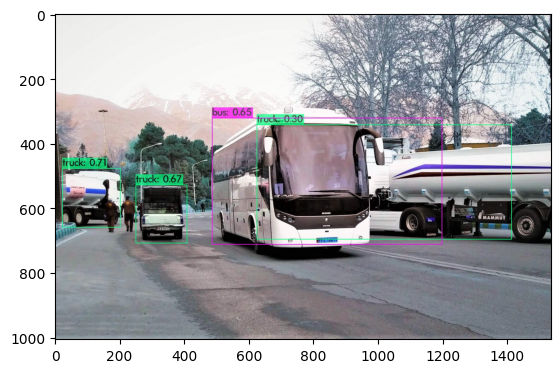

In [ ]:
from matplotlib import pyplot as plt
import cv2 as cv
pred = cv.imread('/content/darknet/1_pred.jpg')
plt.imshow(pred)